<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%ED%8C%8C%EB%A8%B8%EC%99%84_08%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08. 텍스트 분석
* NLP(National Language Processing): 머신이 인간의 언어를 이해하고 해석하는 데 중점을 둠
  * 기계 번역
  * 질의응답 시스템
* 텍스트 분석(=텍스트 마이닝): 비정형 텍스트에서 의미 있는 정보 추출
  * 머신러닝, 언어이해, 통계 등을 활용해 모델 수립 및 정보 추출을 통한 비즈니스 인텔리전스나 예측 분석 등의 분석 작업
  
  </br>

### 1) 텍스트 분석 이해
  * 텍스트 분석: 비정형 데이터인 텍스트를 분석
  * 텍스트 변환
    * 피처 벡터화, 피처 추출
      * BOW(Bag of Words)
      * Word2vec

#### 1.1) 텍스트 분석 수행 프로세스
1. 텍스트 사전 준비작업(전처리)
2. 피처 벡터화/추출
3. ML 모델 수립 및 학습/예측/평가

#### 1.2) 파이썬 기반의 NLP, 텍스트 분석 패키지
1. NLTK: NLP 패키지, 수행 속도 아쉬움
2. Gensim: 토픽 모델링, Word2Vec
3. spaCy: 뛰어난 수행 성능, 최근 가장 주목

### 2) 텍스트 사전 준비 작업- 텍스트 정규화
* 클렌징: 분석에 방해되는 문자, 기호 제거
* 토큰화
  * 문장
  * 단어 토큰화
* 필터링/스톱 워드 제거/철자 수정
* Stemming
* Lemmatization



In [1]:
# 문장 토큰화

from nltk import sent_tokenize
import nltk
nltk.download('punkt')  # 마침표, 개행문자 등의 데이터 세트 다운로드

text_sample = 'The Matrix is everywhere its all around us, here even in ths room. \
              You can see it out your window or on your television. \
              You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample) # 각 문장으로 구성된 list 객체
print(type(sentences), len(sentences))  # list
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in ths room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


> 3개의 문장으로 된 문자열

In [2]:
# 단어 토큰화
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [3]:
# sent_tokenize, word_tokenize 조합해 문서에 대해서 모든 단어 토큰화

from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'ths', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


In [4]:
# 스톱워드(분석에 큰 의미가 없는 단어) 제거

# 스톱 워드 목록
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


> 영어 스톱워드 개수 179개 중 20개

In [6]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words = []
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환함
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'ths', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


* Stemming
  * Porter
  * Lancaster
  * Snowball Stemmer
* Lemmatization: 더 정교, 의미론적 기반에서 단어 원형을 찾음, 그래서 더 오래걸림
  * WordNetLemmatizer  
> 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것

In [7]:
# NLTK의 LancasterStemmer 이용
# LancasterStemmer()와 같이 필요한 Stemmer 객체를 생성한 뒤 이 객체의 stem('단어') 메서드를 호출
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [8]:
# WordNetLemmatizer 이용
# 일반적으로 Lemmatization은 보다 정확한 원형 단어 추출을 위해 단어의 '품사'를 입력해줘야 함
# 동사: 'v', 형용사: 'a' 입력

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


> 더 정확하게 원형 단어 추출

### 3) BOW
* 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 빈도 값을 부여해 피처 값을 추출하는 모델
* 장점: 쉽고 빠른 구축
* 단점: 문맥 의미 반영 부족, 희소 행렬 문제
* Bow 피처 벡터화: 각 문서의 텍스트를 단어로 추출해 피처로 할당, 각 단어의 발생 빈도와 같은 값을 피처에 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법
  * 카운트 기반의 벡터화: 해당 단어가 나타나는 횟수
  * TF-IDF 기반의 벡터화: 카운트를 보완하려고 사용, 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되 전반적으로 자주나타나는 단어 페널티 부여

#### 3.1 사이킷런의 BOW 피처 벡터화 구현
* Count: CountVectorizer
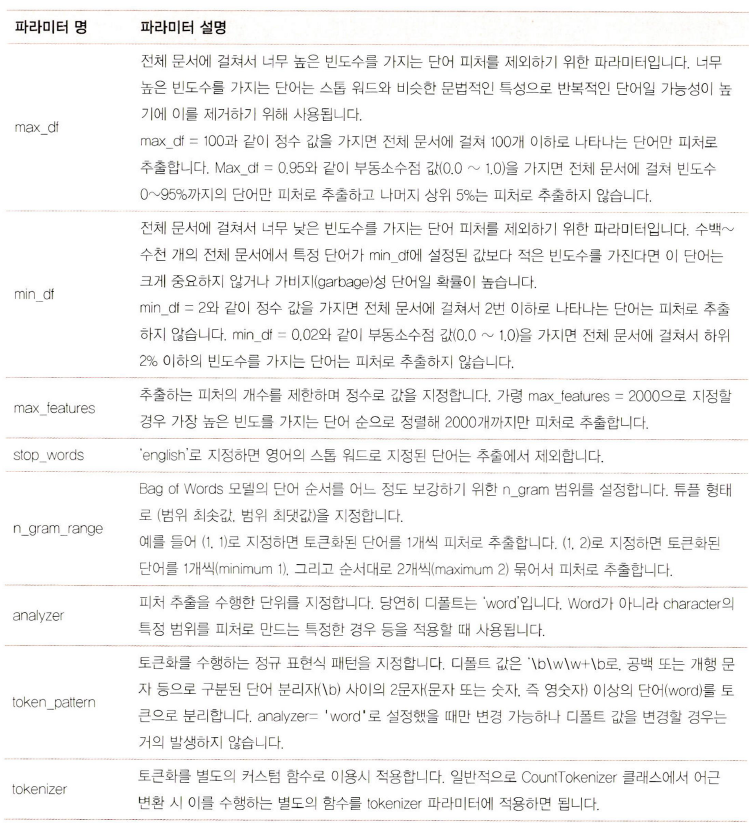
* TF-IDF: TfidfVectorizer

#### 3.2 BOW 벡터화를 위한 희소 행렬
* 희소 행렬
  * COO: 0이 아닌 데이터만 별도의 데이터 배열에 저장, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장
    * Scipy의 sparse 사용
  * CRS: COO 형식이 행, 열 위치를 나타내기 위해 반복적인 위치 데이터를 사용해야하는 문제점을 해결


In [9]:
# COO
import numpy as np

dense = np.array([ [3, 0, 1], [0, 2, 0] ])

In [10]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [11]:
# 이를 toarray() 메서드를 이용해 다시 밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [12]:
# CSR
#scipy의 csr_matrix 사용

from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

# 0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [13]:
# 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성
dense3 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)